# Explore: Movies

In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
movies = catalog.load("movies")

2021-03-11 12:14:12,742 - kedro.io.data_catalog - INFO - Loading data from `movies` (ParquetDataSet)...


In [4]:
movies = movies.set_index("id")

In [5]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path
id,,,,,,,,,,,,,,,,,,,,,
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,Released,,Ariel,False,6.8,127,NaN,None,None,None
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,Released,,Shadows in Paradise,False,7.2,124,NaN,None,None,None
5,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.7,1896,NaN,None,None,None
6,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.5,181,NaN,None,None,None
8,False,None,NaN,42000,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifeinloops.com,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,...,Released,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.3,13,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,/3ugxkNhsN7MWwshk9jR6Xi7cFTR.jpg,NaN,14000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://movies.disney.com/the-great-mouse-detec...,tt0091149,en,The Great Mouse Detective,When the diabolical Professor Ratigan kidnaps ...,...,Released,London's crime-fighting ace on his most baffli...,The Great Mouse Detective,False,7.0,1133,NaN,None,None,None
9995,False,None,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",,tt0216772,en,Turn It Up,Trying to bootstrap his way out of Brooklyn's ...,...,Released,How you gonna win?,Turn It Up,False,5.4,15,NaN,None,None,None
9997,False,/x3fxdeMaH8kSgfxW2DhPB3rHw1q.jpg,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",,tt0857376,en,Gabriel,Gabriel tells the story of an archangel who fi...,...,Released,Far From Grace,Gabriel,False,5.7,233,NaN,None,None,None


## Genre Labels

In [15]:
movies["genres"]

id
2       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
3       [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
5       [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...
6       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
8                     [{'id': 99, 'name': 'Documentary'}]
                              ...                        
9994    [{'id': 16, 'name': 'Animation'}, {'id': 10751...
9995    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
9997    [{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...
9998    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
9999    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
Name: genres, Length: 5141, dtype: object

In [16]:
movies["genre_ids"] = movies["genres"].apply(lambda ls: [d["id"] for d in ls])

In [17]:
movies["genre_names"] = movies["genres"].apply(lambda ls: [d["name"] for d in ls])

In [18]:
movies["genre_names"]

id
2                           [Drama, Crime, Comedy]
3                                  [Drama, Comedy]
5                                  [Crime, Comedy]
6                        [Action, Thriller, Crime]
8                                    [Documentary]
                           ...                    
9994       [Animation, Family, Adventure, Mystery]
9995                        [Action, Crime, Drama]
9997    [Fantasy, Horror, Action, Science Fiction]
9998         [Adventure, Fantasy, Science Fiction]
9999                                [Crime, Drama]
Name: genre_names, Length: 5141, dtype: object

In [19]:
all_genre_list = []
for genre_list in movies["genre_names"]:
    all_genre_list += genre_list

In [20]:
all_genres = set(all_genre_list)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [21]:
genre_labels = pandas.get_dummies(
    movies["genre_names"].apply(pandas.Series).stack(),
    prefix="Genre"
).sum(level=0)

/Users/cls/Documents/Freelancing/Projects/WildCodeSchool/env_movie_poster_classifier/lib/python3.8/site-packages/pandas/core/series.py:4138: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [22]:
genre_labels

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
id,,,,,,,,,,,,,,,,,,,
2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
9995,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


<AxesSubplot:>

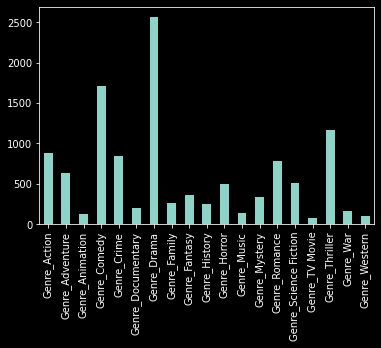

In [23]:
genre_labels.sum().plot(kind="bar")

## Feature Data Frame

In [24]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'genre_ids', 'genre_names'],
      dtype='object')

In [26]:
posters = movies[["original_title", "poster_path"]]

In [27]:
posters

,original_title,poster_path
id,,
2,Ariel,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
3,Varjoja paratiisissa,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
5,Four Rooms,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
6,Judgment Night,/rYFAvSPlQUCebayLcxyK79yvtvV.jpg
8,Life in Loops (A Megacities RMX),/x7Sz339F2oC8mBf0DHCQpKizXaL.jpg
...,...,...
9994,The Great Mouse Detective,/6hZAOLb9HdPfqqvPpm5GD2BN7fT.jpg
9995,Turn It Up,/1LqMTyQJnI7IfeDjjGRcDh1vv0r.jpg
9997,Gabriel,/ibFdvidQgmBvDSMRW39sAu8P4zn.jpg
